In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
test = pd.read_csv("test.csv", sep=";")
train = pd.read_csv("train.csv", sep=";")

In [3]:
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [4]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [5]:
print(train.shape)
print(test.shape)

(6000, 13)
(2128, 13)


In [6]:
#check the numbers of samples and features
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The test data size before dropping Id feature is : (2128, 13) 
The test data size after dropping Id feature is : (2128, 12) 


In [7]:
train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
#kiểm tra có cái nào bị nan trong khung dữ liệu
train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2128 non-null   object 
 1   year          2128 non-null   int64  
 2   km_driven     2128 non-null   int64  
 3   fuel          2128 non-null   object 
 4   seller_type   2128 non-null   object 
 5   transmission  2128 non-null   object 
 6   owner         2128 non-null   object 
 7   mileage       2066 non-null   object 
 8   engine        2066 non-null   object 
 9   max_power     2067 non-null   object 
 10  torque        2066 non-null   object 
 11  seats         2066 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 199.6+ KB


## EDA

In [11]:
#Tìm số lượng giá trị duy nhất có trong mỗi cột
train.nunique()

name             1801
year               28
selling_price     588
km_driven         760
fuel                4
seller_type         3
transmission        2
owner               5
mileage           371
engine            118
max_power         303
torque            413
seats               9
dtype: int64

In [12]:
train.year.value_counts()

2017    752
2016    630
2018    608
2015    572
2013    493
2012    485
2014    470
2011    448
2019    425
2010    290
2009    165
2008    159
2007    130
2006     86
2005     73
2020     49
2004     46
2003     39
2002     24
2000     14
1999     11
1997     10
2001      8
1998      7
1996      2
1995      2
1983      1
1994      1
Name: year, dtype: int64

Diesel    3265
Petrol    2664
CNG         44
LPG         27
Name: fuel, dtype: int64


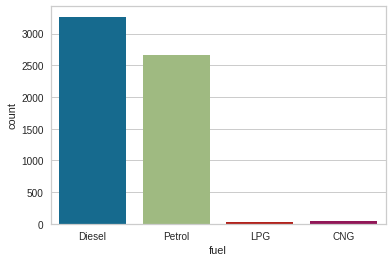

In [13]:
sns.countplot(x='fuel',data=train)
print(train.fuel.value_counts())

Hai loại fuel được sử dụng nhiều là Diesel và Petrol. Hai loại fuel rất ít dòng xe sử dụng (chiếm số lượng rất nhỏ) là LPG và CNG.

Manual       87.133333
Automatic    12.866667
Name: transmission, dtype: float64


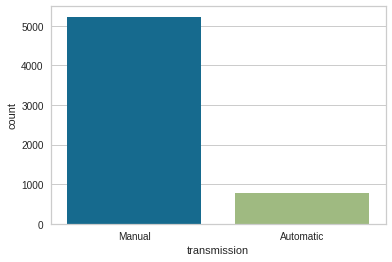

In [14]:
sns.countplot(x='transmission',data=train)
print(train.transmission.value_counts(normalize=True)*100)

Nhiều loại xe sử dụng hộp số sàn hơn là hộp số tự động (hơn gấp 4 lần).

First Owner             65.066667
Second Owner            25.966667
Third Owner              6.900000
Fourth & Above Owner     1.983333
Test Drive Car           0.083333
Name: owner, dtype: float64


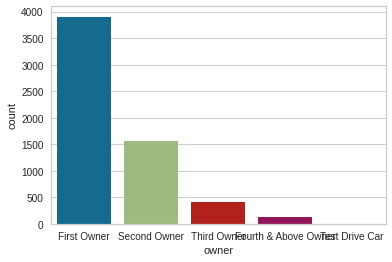

In [15]:
sns.countplot(x='owner',data=train)
print(train.owner.value_counts(normalize=True)*100)

5.0     4590
7.0      842
8.0      175
4.0       99
9.0       68
6.0       49
10.0      15
2.0        2
14.0       1
Name: seats, dtype: int64


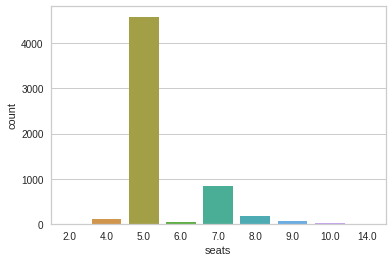

In [16]:
sns.countplot(x='seats',data=train)
print(train.seats.value_counts())

Đa số các xe có 5 chỗ ngồi (4590/6000 chiếc ở tập train)

## Outliers

In [17]:
#standardizing data
sellingprice_scaled = StandardScaler().fit_transform(train['selling_price'][:,np.newaxis]);
low_range = sellingprice_scaled[sellingprice_scaled[:,0].argsort()][:10]
high_range= sellingprice_scaled[sellingprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.75474756]
 [-0.75474756]
 [-0.75288294]
 [-0.75059307]
 [-0.74854867]
 [-0.74854867]
 [-0.74854867]
 [-0.74854867]
 [-0.74234978]
 [-0.74234978]]

outer range (high) of the distribution:
[[ 6.55126441]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.92319782]
 [ 7.29513123]
 [11.60583946]]


- Low range values khá là tương tự nhau và không quá xa 0.
- High range values khá là xa không, có giá trị là 6.55 đến 11.6, đặc biệt chú ý đến range 7.295 và 11.605

## Bivariate analysis

In [18]:
train.describe()

,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


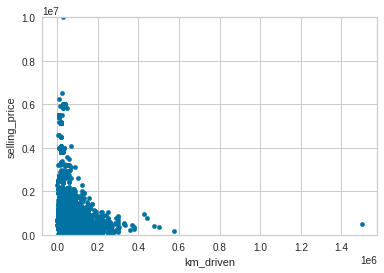

In [19]:
# Selling_price và 'km_driven'
var = 'km_driven'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,10000000));

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
trace0 = go.Box(y=train['selling_price'],name='Selling_price')
trace1 = go.Box(y=data['km_driven'],name='km_driven')
trace2 = go.Box(y=train['seats'],name='seats')
trace3 = go.Box(y=train['year'],name='year')
fig = make_subplots(rows=2, cols=3)
fig.append_trace(trace0, row = 1, col = 1)
fig.append_trace(trace1, row = 1, col = 2)
fig.append_trace(trace2, row = 1, col = 3)
fig.append_trace(trace3, row = 2, col = 1)
fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')

fig.show()

In [21]:
# Loại bỏ outlier bằng cách đặt giới hạn selling_price và km_driven
train = train[(train["selling_price"]<6533000)]
train = train[(train["km_driven"]<577500)]
print("Tổng số điểm dữ liệu sau khi loại bỏ các ngoại lệ là:", len(train))

Tổng số điểm dữ liệu sau khi loại bỏ các ngoại lệ là: 5998


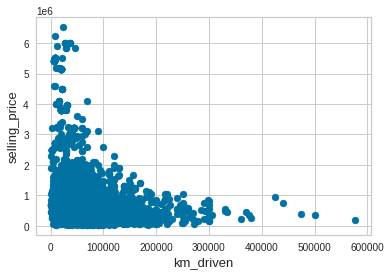

In [22]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['km_driven'], train['selling_price'])
plt.ylabel('selling_price', fontsize=13)
plt.xlabel('km_driven', fontsize=13)
plt.show()

km_driven: số km mà xe đã đi.
xe đã đi càng nhiều (từ 200000 đổ ra) giá xe càng thấp.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


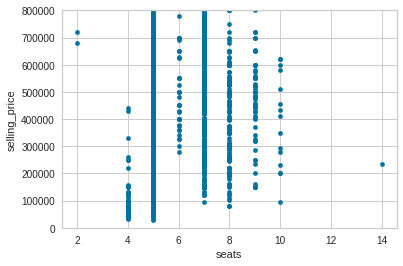

In [23]:
var = 'seats'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


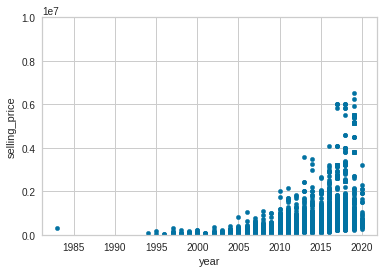

In [24]:
var = 'year'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,10000000));

Max giá của những năm 2016 đến 2019 cao hơn hẳn max giá của những năm khác.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


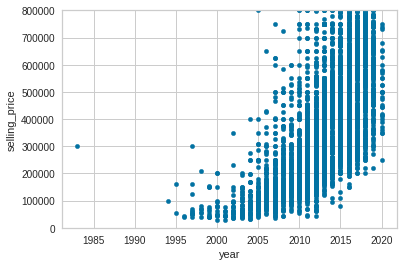

In [25]:
var = 'year'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

Min giá của xe từ năm 2015 (đặc biệt từ năm 2017) đến năm 2020 cao hơn hẳn min giá của những năm khác.

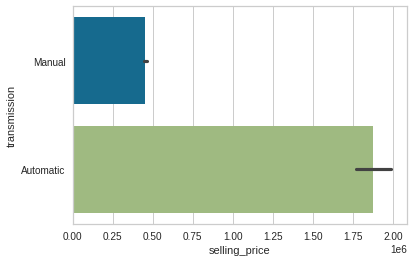

In [26]:
#transmission & selling_price
sns.barplot(y="transmission", x="selling_price", data=train)

Giá của xe dùng hộp số tự động có khoảng rộng hơn nhiều so với hộp số sàn (Manual). Giá của xe dùng hộp số sàn có khoảng khá hẹp và có mức giá thấp.

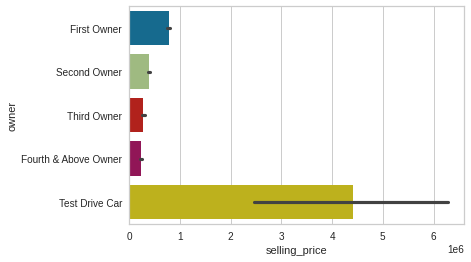

In [27]:
#owner vs selling_price
sns.barplot(y="owner", x="selling_price", data=train)

Test Drive Car có các xe có mức giá cao hơn hẳn những phân loại owner khác.

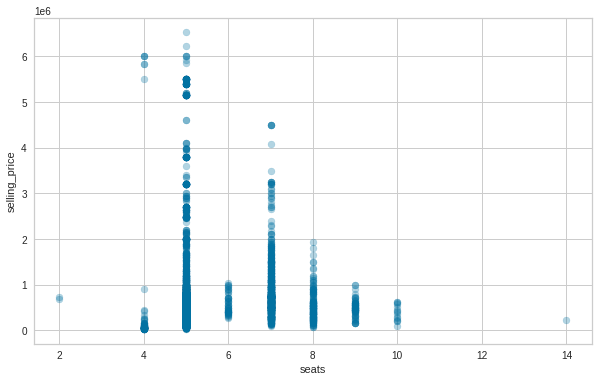

In [28]:
plt.figure(figsize=(10,6))
dc=train.copy()
plt.scatter(dc['seats'],dc['selling_price'],alpha=0.3)
plt.xlabel("seats")
plt.ylabel('selling_price')
plt.show()

Có nhiều xe 5 chỗ ngồi và có khoảng giá khá rộng và có một số xe 5 chỗ có phân khúc giá khá cao.
Không có nhiều xe 4 chỗ nhưng hầu hết đều ở phân khúc giá thấp, nhưng có một số xe ngoại lệ lại ở phân khúc giá cao.
Xe 2 chỗ và 14 chỗ không có nhiều và hai loại xe đấy đều có phân khúc giá thấp.

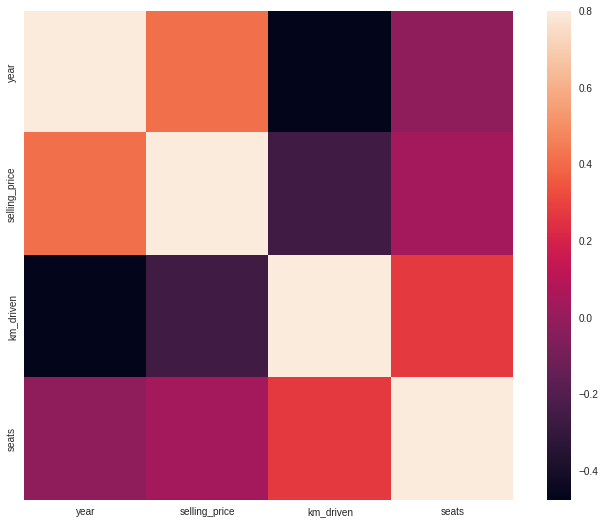

In [29]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Vì không có giá trị |cor| >0.8 nên không có hiện tượng tự tương quan giữa các biến với nhau.
Vậy không cần bỏ bất kì biến nào.


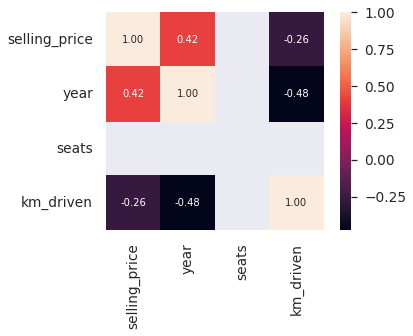

In [30]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'selling_price')['selling_price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

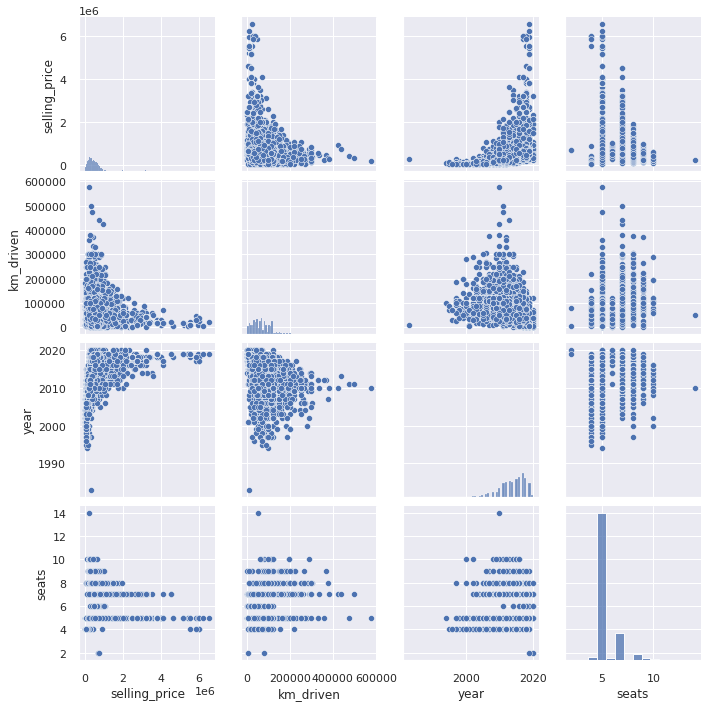

In [31]:
#scatterplot
sns.set()
cols = ['selling_price', 'km_driven', 'year', 'seats']
sns.pairplot(train[cols], size = 2.5)
plt.show();

Phân tích selling_price


 mu = 637238.78 and sigma = 797620.32



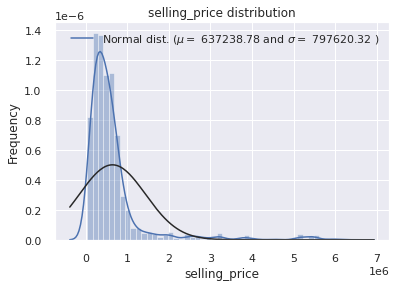

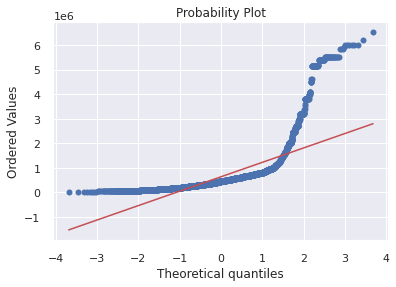

In [32]:
sns.distplot(train['selling_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['selling_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('selling_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['selling_price'], plot=plt)
plt.show()

In [33]:
#skewness and kurtosis
print("Skewness: %f" % train['selling_price'].skew())
print("Kurtosis: %f" % train['selling_price'].kurt())

Skewness: 4.089911
Kurtosis: 19.425340



The target variable bị lệch phải (right skewness). Vì các mô hình (tuyến tính) mong muốn dữ liệu được phân phối bình thường, chúng ta cần transform the varible và làm cho nó được phân phối bình thường hơn.


 mu = 12.97 and sigma = 0.84



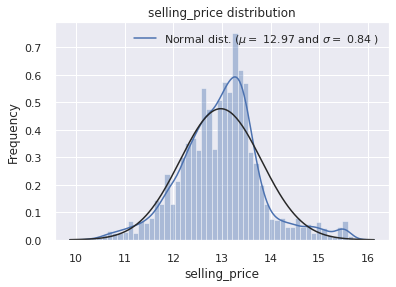

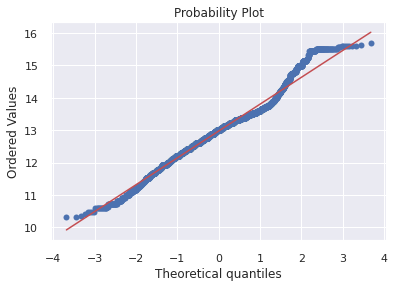

In [34]:
#applying log transformation
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["selling_price"] = np.log1p(train["selling_price"])

#Check the new distribution 
sns.distplot(train['selling_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['selling_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('selling_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['selling_price'], plot=plt)
plt.show()

In [35]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.selling_price.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['selling_price'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (8126, 12)


In [36]:
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


### Missing data

In [37]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
torque,222,0.027320
seats,221,0.027197
engine,221,0.027197
mileage,221,0.027197
max_power,215,0.026458
owner,0,0.000000
transmission,0,0.000000
seller_type,0,0.000000
fuel,0,0.000000
km_driven,0,0.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8126 non-null   object 
 1   year          8126 non-null   int64  
 2   km_driven     8126 non-null   int64  
 3   fuel          8126 non-null   object 
 4   seller_type   8126 non-null   object 
 5   transmission  8126 non-null   object 
 6   owner         8126 non-null   object 
 7   mileage       7905 non-null   object 
 8   engine        7905 non-null   object 
 9   max_power     7911 non-null   object 
 10  torque        7904 non-null   object 
 11  seats         7905 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 761.9+ KB


In [39]:
data.drop(['name'], axis=1, inplace=True)

In [40]:
data.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2018,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,2018,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,2015,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,2015,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [41]:
dc=data.copy()
dc.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2018,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,2018,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,2015,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,2015,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [42]:
data[['mileage', 'unit']] = data['mileage'].str.split(' ', expand=True)
data[['mileage']]
data["mileage"] = data["mileage"].astype((float))


In [43]:
data["mileage"] = data["mileage"].transform(lambda x: x.fillna(x.median()))

In [44]:
data[['engine', 'unit']] = data['engine'].str.split(' ', expand=True)
data[['engine']]
data["engine"] = data["engine"].astype((float))

In [45]:
data["engine"] = data["engine"].transform(lambda x: x.fillna(x.median()))

In [46]:
data.isna().any()

year            False
km_driven       False
fuel            False
seller_type     False
transmission    False
owner           False
mileage         False
engine          False
max_power        True
torque           True
seats            True
unit             True
dtype: bool

In [47]:
data.drop(['unit'], axis=1, inplace=True)

In [48]:
data[['max_power', 'unit']] = data['max_power'].str.split(' ', expand=True)
data['max_power']

0       108.5
1       88.76
2       168.5
3       121.3
4         190
        ...  
8121    81.86
8122    74.02
8123     52.8
8124    126.2
8125    81.80
Name: max_power, Length: 8126, dtype: object

In [49]:
mpc = data['max_power']
mpc = mpc.dropna()

In [50]:
mpc = pd.to_numeric(mpc, errors='coerce')

In [51]:
mpc.mean()

91.4727907711754

In [52]:
data["max_power"] = data["max_power"].str.replace('null','0.0')
data["max_power"] = data["max_power"].fillna('91.47')
data["max_power"] =pd.to_numeric(data["max_power"])

In [53]:
data.describe()

,year,km_driven,mileage,engine,max_power,seats
count,8126.000000,8.126000e+03,8126.000000,8126.000000,8125.000000,7905.000000
mean,2013.803840,6.964841e+04,19.413305,1452.745262,91.472717,5.416698
std,4.044542,5.428429e+04,3.974233,498.159986,35.179560,0.959411
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,6.000000e+04,19.300000,1248.000000,83.100000,5.000000
75%,2017.000000,9.800000e+04,22.270000,1582.000000,101.000000,5.000000
max,2020.000000,2.360457e+06,33.440000,3604.000000,282.000000,14.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8126 non-null   int64  
 1   km_driven     8126 non-null   int64  
 2   fuel          8126 non-null   object 
 3   seller_type   8126 non-null   object 
 4   transmission  8126 non-null   object 
 5   owner         8126 non-null   object 
 6   mileage       8126 non-null   float64
 7   engine        8126 non-null   float64
 8   max_power     8125 non-null   float64
 9   torque        7904 non-null   object 
 10  seats         7905 non-null   float64
 11  unit          7905 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 761.9+ KB


In [55]:
data['max_power'] = data['max_power'].isna()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8126 non-null   int64  
 1   km_driven     8126 non-null   int64  
 2   fuel          8126 non-null   object 
 3   seller_type   8126 non-null   object 
 4   transmission  8126 non-null   object 
 5   owner         8126 non-null   object 
 6   mileage       8126 non-null   float64
 7   engine        8126 non-null   float64
 8   max_power     8126 non-null   bool   
 9   torque        7904 non-null   object 
 10  seats         7905 non-null   float64
 11  unit          7905 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 706.4+ KB


In [57]:
data.drop(['unit'], axis=1, inplace=True)

In [58]:
data["torque"]

0          260Nm@ 1500-2750rpm
1       219.66nm@ 1500-2750rpm
2          360Nm@ 1400-3200rpm
3             154.9Nm@ 4200rpm
4                        400Nm
                 ...          
8121         113.75Nm@ 4000rpm
8122            190Nm@ 2000rpm
8123             85Nm@ 2500rpm
8124     259.9Nm@ 1900-2750rpm
8125            113Nm@ 4200rpm
Name: torque, Length: 8126, dtype: object

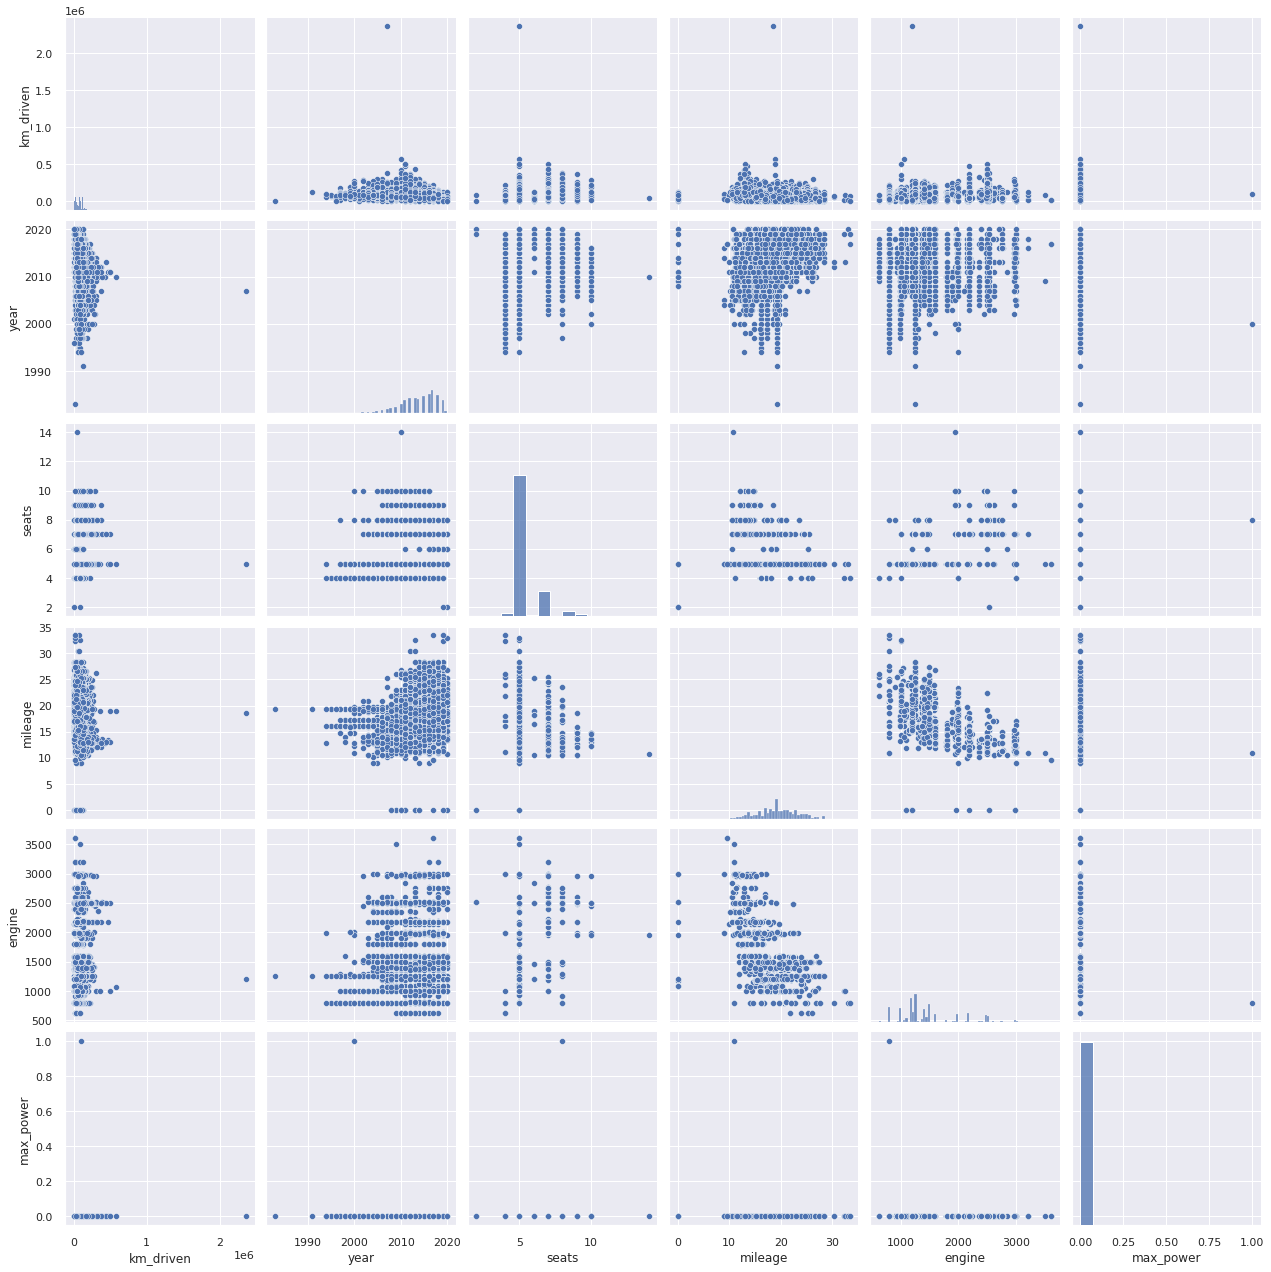

In [59]:
#scatterplot
sns.set()
cols = ['km_driven', 'year', 'seats','mileage','engine','max_power']
sns.pairplot(data[cols], size = 3.0)
plt.show();

In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
trace0 = go.Box(y=train['engine'],name='engine')
trace1 = go.Box(y=data['mileage'],name='mileage')
trace2 = go.Box(y=train['max_power'],name='max_power')

fig = make_subplots(rows=2, cols=3)
fig.append_trace(trace0, row = 1, col = 1)
fig.append_trace(trace1, row = 1, col = 2)
fig.append_trace(trace2, row = 1, col = 3)

fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')

fig.show()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8126 non-null   int64  
 1   km_driven     8126 non-null   int64  
 2   fuel          8126 non-null   object 
 3   seller_type   8126 non-null   object 
 4   transmission  8126 non-null   object 
 5   owner         8126 non-null   object 
 6   mileage       8126 non-null   float64
 7   engine        8126 non-null   float64
 8   max_power     8126 non-null   bool   
 9   torque        7904 non-null   object 
 10  seats         7905 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 642.9+ KB


In [62]:
data.drop(['torque'], axis=1, inplace=True)

In [63]:
data["seats"] = data["seats"].transform(lambda x: x.fillna(x.median()))

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8126 non-null   int64  
 1   km_driven     8126 non-null   int64  
 2   fuel          8126 non-null   object 
 3   seller_type   8126 non-null   object 
 4   transmission  8126 non-null   object 
 5   owner         8126 non-null   object 
 6   mileage       8126 non-null   float64
 7   engine        8126 non-null   float64
 8   max_power     8126 non-null   bool   
 9   seats         8126 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 579.4+ KB


Label Encoding

In [65]:
# Nhận danh sách các biến phân loại
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Các biến phân loại trong tập bộ liệu:", object_cols)

Các biến phân loại trong tập bộ liệu: ['fuel', 'seller_type', 'transmission', 'owner']


In [66]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding the object dtypes
LE=LabelEncoder()
for i in object_cols:
  data[i]=data[[i]].apply(LE.fit_transform)

In [67]:
data

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2018,9500,1,1,1,0,21.50,1497.0,False,5.0
1,2018,30000,1,1,1,0,21.19,1396.0,False,5.0
2,2015,80000,1,1,0,2,12.55,2982.0,False,7.0
3,2015,35000,3,1,1,0,17.01,1591.0,False,5.0
4,2019,20000,1,1,0,0,18.00,1969.0,False,5.0
...,...,...,...,...,...,...,...,...,...,...
8121,2020,2000,3,0,1,0,20.70,1197.0,False,5.0
8122,2018,100000,1,1,1,2,28.40,1248.0,False,5.0
8123,2011,172000,1,1,1,2,17.88,1396.0,False,5.0
8124,2017,47000,1,1,1,2,19.67,1582.0,False,5.0


In [68]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
from scipy.stats import skew

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness)

from scipy.stats import kurtosis
kurt_feats = data[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)
print("\nKurt in numerical features: \n")
kurtosis = pd.DataFrame({'Kurt' :kurt_feats})
print(kurtosis)


Skew in numerical features: 

                   Skew
max_power     90.127688
km_driven     10.388619
seats          2.016644
owner          1.258276
engine         1.176041
fuel           0.177297
mileage       -0.163777
seller_type   -0.929845
year          -1.072049
transmission  -2.212386

Kurt in numerical features: 

                     Kurt
max_power     8121.000123
km_driven      393.559700
seats            4.017171
transmission     2.894652
seller_type      2.420384
year             1.704786
engine           0.856330
mileage          0.568272
owner            0.521849
fuel            -1.903234


Training Model

In [69]:
#Box Cox Transformation of (highly) skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

There are 10 skewed numerical features to Box Cox transform


In [70]:
#Getting dummy categorical features
data = pd.get_dummies(data)
print(data.shape)

(8126, 10)


In [71]:
#Getting the new train and test sets.
train = data[:ntrain]
test = data[ntrain:]

In [72]:
train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,14.210867,19.670808,0.730463,0.730463,0.730463,0.000000,3.968300,13.296779,0.0,2.055642
1,14.210867,24.628632,0.730463,0.730463,0.730463,0.000000,3.946191,13.088841,0.0,2.055642
2,14.206211,29.588763,0.730463,0.730463,0.000000,1.194318,3.189309,15.469720,0.0,2.440268
3,14.206211,25.360669,1.540963,0.730463,0.730463,0.000000,3.619079,13.479861,0.0,2.055642
4,14.212418,22.782058,0.730463,0.730463,0.000000,0.000000,3.701973,14.134068,0.0,2.055642


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5998 non-null   float64
 1   km_driven     5998 non-null   float64
 2   fuel          5998 non-null   float64
 3   seller_type   5998 non-null   float64
 4   transmission  5998 non-null   float64
 5   owner         5998 non-null   float64
 6   mileage       5998 non-null   float64
 7   engine        5998 non-null   float64
 8   max_power     5998 non-null   float64
 9   seats         5998 non-null   float64
dtypes: float64(10)
memory usage: 468.7 KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 5998 to 8125
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   float64
 1   km_driven     2128 non-null   float64
 2   fuel          2128 non-null   float64
 3   seller_type   2128 non-null   float64
 4   transmission  2128 non-null   float64
 5   owner         2128 non-null   float64
 6   mileage       2128 non-null   float64
 7   engine        2128 non-null   float64
 8   max_power     2128 non-null   float64
 9   seats         2128 non-null   float64
dtypes: float64(10)
memory usage: 166.4 KB


# Modelling

Việc làm model dựa vào phương pháp **ensemble learning** :combine một số mô hình với nhau tạo ra combine model mạnh có khả năng cải thiện hiệu suất tổng thể so với chỉ sử dụng một mô hình đơn lẻ.
Trong project này, dùng loại Stacking (Xếp chồng).
**Stacking** xây dựng một số models và một mô hình supervisor model, mô hình này sẽ học cách kết hợp kết quả dự báo của một số mô hình một cách tốt nhất. Mục tiêu của Stacking giảm bias - áp dụng cho các model có variance thấp và bị bias cao.
1. Base Model: Các mô hình phù hợp với dữ liệu đào tạo và có các dự đoán được tổng hợp.
2. Meta Model:  Mô hình học cách kết hợp tốt nhất các dự đoán của các mô hình cơ sở.

> Kết quả đầu ra từ các mô hình cơ sở được sử dụng làm đầu vào cho mô hình meta
Cách tiếp cận phổ biến nhất để chuẩn bị tập dữ liệu đào tạo cho meta model là thông qua xác nhận chéo k-lần (Evaluating the cross validation rmsle error) đối với các base model.






In [75]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

In [76]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base Models

In [77]:
#Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [78]:
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [79]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


**Gradient Boosting** là một thuật toán xuất phát từ thuật toán Decision Tree, nó thực hiện việc xây dựng tuần tự nhiều Decision Tree và tiến hành học tập.**XGBoost** (Extreme Gradient Boosting) là một giải thuật được base trên gradient boosting.
Gradient boosting và XGBoost đều dựa trên cùng ý tưởng đó là boosting thông qua gradient descent trong không gian hàm số. Tuy nhiên, điều làm nên hiệu suất ấn tượng và khả năng tính toán của XGBoost nằm ở ba yếu tố:

1. Engineering để tránh overfitting như: sub-sampling row, column, column per split levels, áp dụng regularized L1 và L2.
2. Khả năng tận dụng tài nguyên hệ thống: tính toán song song trên CPU/GPU, tính toán phân tán trên nhiều server, tính toán khi tài nguyên bị giới hạn, cache optimization để tăng tốc training.
3. Khả năng xử lý missing data value, tiếp tục training bằng mô hình đã được build trước đó để tiết kiệm thời gian.

In [80]:
#GBoost
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [81]:
#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)

**LightGBM** là một FrameWork để xử lý thuật toán tăng cường độ dốc (Gradient Boosting).

In [82]:
#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

## Evaluating the cross validation rmsle error

In [83]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3553 (0.0124)



In [84]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3553 (0.0124)



In [85]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3945 (0.0055)



In [86]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.2253 (0.0049)



In [87]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.2334 (0.0068)



In [88]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.2698 (0.0094)



### Stacking models

In [89]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [90]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3003 (0.0072)



### Meta Model

In [91]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # Khớp dữ liệu về các bản sao của mô hình gốc.
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [92]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)



In [ ]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

### Ensembling 

In [93]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [94]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.16974245509434108


In [95]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.19311290712042586


In [96]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.25605220009148866


In [97]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.1801791196884023


In [98]:
#Ensemble prediction:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

Predict

In [99]:
pre = pd.DataFrame()
pre['Id'] = test_ID
pre['Predicted'] = ensemble
pre.to_csv('prediction.csv',index=False)